# Naîve Matrix Multiplication

In [4]:
import numpy as np

# Generate random matrix of dimension N x k

def matrix(n,k):
    return np.random.rand(n,k)

In [20]:
def multiply(A,B):
    
    # matrices must be in order of multiplication because AB ! BA
        
    A_rows = A.shape[0]
    A_cols = A.shape[1]
    B_rows = B.shape[0]
    B_cols = B.shape[1]
    
    # Create empty zeroes matrix
    
    C = np.zeros((A_rows, B_cols))
    
    #check if columns(A) == rows(B)

    if A_cols != B_rows:
        print("Incompatible dimensions. Check if columns(A) equals row(B)")
    
    #Loop in each row of A
        #Loop in each column of b
            #Loop in 1:n_cols_of_A (=n_rows_of_B)
                #multiply and sum
    
    else:
        for i in range(A_rows):
            for j in range(B_cols):
                for k in range(A_cols):
                    C[i,j] += A[i,k]*B[k,j]
    
    return C

In [18]:
A = matrix(3,3)
B = matrix(3,3)
C = A.dot(B)

C

array([[ 1.60797302,  0.49171798,  0.65443366],
       [ 1.27512592,  0.49326727,  0.49687351],
       [ 1.91146173,  0.57579208,  0.80685588]])

In [21]:
#Check if the result matches the real value
multiply(A,B)

array([[ 1.60797302,  0.49171798,  0.65443366],
       [ 1.27512592,  0.49326727,  0.49687351],
       [ 1.91146173,  0.57579208,  0.80685588]])

In [36]:
#sample code to store code run time

import time

start = time.time()
multiply(matrix(200,200), matrix(200,200))
time_count = time.time() - start

In [37]:
time_count

6.274398565292358

In [40]:
#Check how run time grows as dimension of matrices grow
#Multiply square matrices from 1 to 200

runtimes = []

for i in range(1,201):
    
    start = time.time()
    multiply(matrix(i,i), matrix(i,i))
    time_count = time.time() - start
    
    runtimes.append(time_count)
    
    if i % 10 == 0:
        print(i)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


(0, 7)

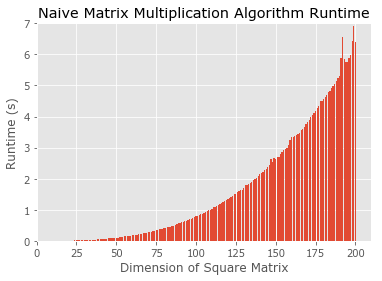

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.bar(range(1,201), runtimes)

plt.xlabel('Dimension of Square Matrix')
plt.ylabel('Runtime (s)')
plt.title('Naive Matrix Multiplication Algorithm Runtime')

plt.xlim(0,210)
plt.ylim(0,7)

### Comparison with numpy dot method

In [92]:
np_runtime= []

for i in range(1,1001):
    
    start = time.time()
    matrix(i,i).dot(matrix(i,i))
    time_count = time.time() - start
    
    np_runtime.append(time_count)
    
    if i % 10 == 0:
        print(i)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


Text(0.5,1,'Numpy Matrix Multiplication Runtime')

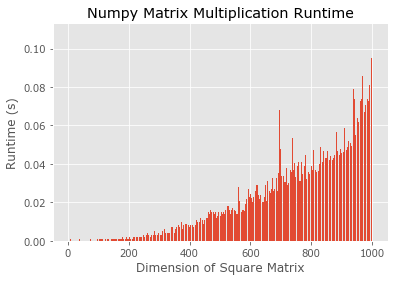

In [94]:
plt.style.use('ggplot')
plt.bar(range(1,1001), np_runtime)

plt.xlabel('Dimension of Square Matrix')
plt.ylabel('Runtime (s)')
plt.title('Numpy Matrix Multiplication Runtime')

#plt.xlim(0,210)
#plt.ylim(0,7)

# Other algorithms

## Strassen Algorithm: 2x2 Case

In [159]:
def strassen(A,B):
    
    if A.shape[0] == 1:
        mult = A*B
    else:
        p1 = A[0,0]*(B[0,1]-B[1,1])
        p2 = (A[0,0]+A[0,1])*B[1,1] 
        p3 = (A[1,0]+A[1,1])*B[0,0]
        p4 = A[1,1]*(B[1,0]-B[0,0])
        p5 = (A[0,0]+A[1,1])*(B[0,0]+B[1,1])
        p6 = (A[0,1]-A[1,1])*(B[1,0]+B[1,1])
        p7 = (A[0,0]-A[1,0])*(B[0,0]+B[0,1])

        mult = np.matrix([[p5+p4-p2+p6, p1+p2],[p3+p4,p1+p5-p3-p7]])
    return mult

In [212]:
A = matrix(2,2)
B = matrix(2,2)

In [213]:
A.dot(B)

array([[ 0.1123171 ,  0.20124155],
       [ 0.22031366,  0.24754482]])

In [132]:
from math import ceil,log

## Strassen Algorithm: $2^k$ Case

In [235]:
def strassen2k(A,B):
    #n: dimension of the matrix being n = 2^k
    n = A.shape[0]
    
    if n <= 2:
        mult = strassen(A,B)
    
    else:
        
        k = int(n/2)
        
        C11 = strassen2k(A[:k, :k], B[:k, :k]) + strassen2k(A[:k, k:], B[k:, :k])
        C12 = strassen2k(A[:k, :k], B[:k, k:]) + strassen2k(A[:k, k:], B[k:, k:])
        C21 = strassen2k(A[k:, :k], B[:k, :k]) + strassen2k(A[k:, k:], B[k:, :k])
        C22 = strassen2k(A[k:, :k], B[:k, k:]) + strassen2k(A[k:, k:], B[k:, k:])
        
        C = np.zeros((n,n))
        
        C[:k, :k] = C11
        C[:k, k:] = C12
        C[k:, :k] = C21
        C[k:, k:] = C22
        
        mult = C
    
    return mult

In [217]:
A = matrix(4,4)
B = matrix(4,4)

In [218]:
strassen2k(A,B)

array([[ 0.96709907,  0.87124788,  1.16610796,  0.68234363],
       [ 0.44606534,  0.25166153,  0.44730012,  0.26666944],
       [ 0.91592916,  0.51097905,  0.93869369,  0.50437938],
       [ 0.90749677,  0.70118001,  0.93324436,  0.7248845 ]])

In [219]:
A.dot(B)

array([[ 0.96709907,  0.87124788,  1.16610796,  0.68234363],
       [ 0.44606534,  0.25166153,  0.44730012,  0.26666944],
       [ 0.91592916,  0.51097905,  0.93869369,  0.50437938],
       [ 0.90749677,  0.70118001,  0.93324436,  0.7248845 ]])

In [220]:
strassen_runtime = []
naive_runtime = []

for i in range(2,9):
    
    k = 2 ** i
    
    A = matrix(k,k)
    B = matrix(k,k)
    
    start = time.time()
    strassen2k(A,B)
    time_count = time.time() - start
    strassen_runtime.append(time_count)
    
    start = time.time()
    multiply(A,B)
    time_count = time.time() - start
    naive_runtime.append(time_count)
    
    print(i)

2
3
4
5
6
7
8


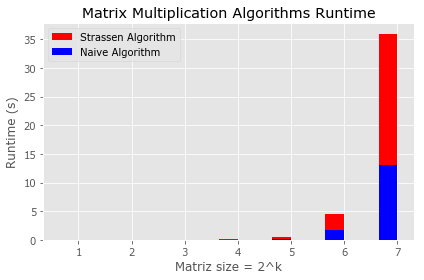

In [223]:
plt.style.use('ggplot')

n_groups = 8
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, tuple(strassen_runtime), bar_width,
                alpha=1, color='r',
                label='Strassen Algorithm')

rects2 = ax.bar(index, tuple(naive_runtime), bar_width,
                alpha=1, color='b',
                label='Naive Algorithm')

ax.set_xlabel('Matriz size = 2^k')
ax.set_ylabel('Runtime (s)')
ax.set_title('Matrix Multiplication Algorithms Runtime')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,9))
ax.legend()

fig.tight_layout()

## Winograd Algorithm

In [224]:
def winograd(A,B):
    
    if A.shape[0] == 1:
        mult = A*B
        
    else:
        x1 = A[1,0] + A[1,1]
        x2 = x1 - A[0,0]
        x3 = A[0,0] - A[1,0]
        x4 = A[0,1] - x2
        x5 = B[0,1] - B[0,0]
        x6 = B[1,1] - x5
        x7 = B[1,1] - B[0,1]
        x8 = x6 - B[1,0]
        
        y1 = x2*x6
        y2 = A[0,0]*B[0,0]
        y3 = A[0,1]*B[1,0]
        y4 = x3*x7
        y5 = x1*x5
        y6 = x4*B[1,1]
        y7 = A[1,1]*x8
        
        z1 = y1 + y2
        z2 = z1 + y4
        
        C = np.zeros((2,2))
        
        C[0,0] = y2 + y3
        C[0,1] = z1 + y5 + y6
        C[1,0] = z2 - y7
        C[1,1] = z2 + y5
        
        mult = C
        
    return mult


In [225]:
A = matrix(2,2)
B = matrix(2,2)

In [226]:
winograd(A,B)

array([[ 0.06934001,  0.32270988],
       [ 0.21440885,  0.91948947]])

In [227]:
A.dot(B)

array([[ 0.06934001,  0.32270988],
       [ 0.21440885,  0.91948947]])

In [228]:
def winograd2k(A,B):
    #n: dimension of the matrix being n = 2^k
    n = A.shape[0]
    
    if n <= 2:
        mult = winograd(A,B)
    
    else:
        
        k = int(n/2)
        
        C11 = winograd2k(A[:k, :k], B[:k, :k]) + winograd2k(A[:k, k:], B[k:, :k])
        C12 = winograd2k(A[:k, :k], B[:k, k:]) + winograd2k(A[:k, k:], B[k:, k:])
        C21 = winograd2k(A[k:, :k], B[:k, :k]) + winograd2k(A[k:, k:], B[k:, :k])
        C22 = winograd2k(A[k:, :k], B[:k, k:]) + winograd2k(A[k:, k:], B[k:, k:])
        
        C = np.zeros((n,n))
        
        C[:k, :k] = C11
        C[:k, k:] = C12
        C[k:, :k] = C21
        C[k:, k:] = C22
        
        mult = C
    
    return mult

In [229]:
A = matrix(4,4)
B = matrix(4,4)

In [230]:
winograd2k(A,B)

array([[ 0.42966341,  1.40212541,  1.5164308 ,  1.0929263 ],
       [ 0.45899625,  1.45645059,  1.85444723,  1.43647783],
       [ 0.41380589,  1.45423761,  1.66975223,  1.00806058],
       [ 0.31214578,  0.9203754 ,  1.16881302,  0.74752394]])

In [231]:
A.dot(B)

array([[ 0.42966341,  1.40212541,  1.5164308 ,  1.0929263 ],
       [ 0.45899625,  1.45645059,  1.85444723,  1.43647783],
       [ 0.41380589,  1.45423761,  1.66975223,  1.00806058],
       [ 0.31214578,  0.9203754 ,  1.16881302,  0.74752394]])

In [259]:
strassen_runtime = []
winograd_runtime = []
naive_runtime = []

for i in range(1,9):
    
    k = 2 ** i
    
    A = matrix(k,k)
    B = matrix(k,k)
    
    start = time.time()
    strassen2k(A,B)
    time_count = time.time() - start
    strassen_runtime.append(time_count)
    
    start = time.time()
    multiply(A,B)
    time_count = time.time() - start
    naive_runtime.append(time_count)
    
    start = time.time()
    winograd2k(A,B)
    time_count = time.time() - start
    winograd_runtime.append(time_count)
    
    print(i)

1
2
3
4
5
6
7
8


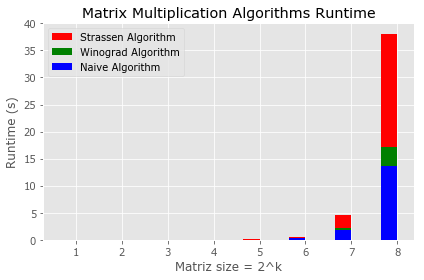

In [263]:
plt.style.use('ggplot')

n_groups = 8
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, tuple(strassen_runtime), bar_width,
                alpha=1, color='r',
                label='Strassen Algorithm')

rects2 = ax.bar(index, tuple(winograd_runtime), bar_width,
                alpha=1, color='g',
                label='Winograd Algorithm')

rects3 = ax.bar(index, tuple(naive_runtime), bar_width,
                alpha=1, color='b',
                label='Naive Algorithm')

ax.set_xlabel('Matriz size = 2^k')
ax.set_ylabel('Runtime (s)')
ax.set_title('Matrix Multiplication Algorithms Runtime')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,9))
ax.legend()

fig.tight_layout()

In [265]:
%%time
winograd2k(matrix(512,512), matrix(512,512))

Wall time: 2min 23s


array([[ 133.41955439,  129.03028104,  129.85529774, ...,  122.14694355,
         130.54709375,  127.67763708],
       [ 127.52219497,  129.8135614 ,  131.36477632, ...,  124.07282892,
         132.7964671 ,  128.90218373],
       [ 130.15603634,  128.10114131,  130.99945583, ...,  124.26652597,
         128.40134114,  126.77880184],
       ..., 
       [ 128.19325053,  127.16920322,  131.61231397, ...,  125.73357864,
         128.83071119,  124.48801214],
       [ 127.51235418,  129.60247443,  127.44645573, ...,  122.60412204,
         124.57329361,  127.80711921],
       [ 133.70528434,  131.22391123,  133.82299511, ...,  128.30847671,
         131.25208298,  132.55541221]])

In [271]:
%%time
matrix(5512,5512).dot(matrix(5512,5512))

Wall time: 6.17 s


array([[ 1398.05812608,  1385.88438134,  1380.21624481, ...,
         1395.48426019,  1389.12283398,  1384.65559739],
       [ 1367.69151997,  1377.278885  ,  1368.96396371, ...,
         1380.71785289,  1380.67610795,  1365.98844271],
       [ 1373.56343748,  1379.64673214,  1353.53082808, ...,
         1372.35329649,  1368.81418697,  1357.10898144],
       ..., 
       [ 1394.67758237,  1390.020819  ,  1386.35260392, ...,
         1394.04183788,  1405.41699082,  1382.17899587],
       [ 1369.38556298,  1365.53996588,  1351.70799501, ...,
         1379.74378165,  1374.31364139,  1368.43722429],
       [ 1365.87620591,  1357.51119286,  1370.42550223, ...,
         1370.36991432,  1369.03402427,  1361.56356923]])

In [268]:
%%time
multiply(matrix(512,512), matrix(512,512))

Wall time: 1min 56s


array([[ 128.95927806,  131.4985847 ,  135.01054817, ...,  132.43243073,
         134.10091078,  126.65770817],
       [ 127.46849341,  129.75986738,  135.10947346, ...,  135.19238037,
         135.10907767,  127.91579021],
       [ 127.41355043,  122.74530724,  123.42469876, ...,  126.36683966,
         125.11537839,  118.94204304],
       ..., 
       [ 124.41292073,  123.45428252,  129.65180349, ...,  129.21888856,
         131.65918385,  123.12787925],
       [ 128.20835301,  129.21002194,  129.8340566 , ...,  131.25858575,
         134.3627736 ,  123.09455431],
       [ 132.54918463,  131.5227657 ,  134.63285133, ...,  133.45519069,
         134.98433105,  128.77536317]])